In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/tomato_leaf_dataset/train'
valid_path = '/content/gdrive/MyDrive/tomato_leaf_dataset/valid'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/tomato_leaf_dataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/tomato_leaf_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/tomato_leaf_dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4589 images belonging to 10 classes.


In [ ]:
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
574/574 [==============================] - 341s 594ms/step - loss: 1.5364 - accuracy: 0.5828 - val_loss: 1.6079 - val_accuracy: 0.5921
Epoch 2/20
574/574 [==============================] - 346s 603ms/step - loss: 1.4150 - accuracy: 0.6098 - val_loss: 1.4059 - val_accuracy: 0.6365
Epoch 3/20
574/574 [==============================] - 346s 603ms/step - loss: 1.5644 - accuracy: 0.5977 - val_loss: 1.5660 - val_accuracy: 0.6073
Epoch 4/20
574/574 [==============================] - 335s 584ms/step - loss: 1.4436 - accuracy: 0.6128 - val_loss: 2.1168 - val_accuracy: 0.5361
Epoch 5/20
574/574 [==============================] - 335s 584ms/step - loss: 1.3117 - accuracy: 0.6292 - val_loss: 2.5346 - val_accuracy: 0.5300
Epoch 6/20
574/574 [==============================] - 337s 586ms/step - loss: 1.4216 - accuracy: 0.6244 - val_loss: 2.0901 - val_accuracy: 0.5522
Epoch 7/20
574/574 [==============================] - 339s 590ms/step - loss: 1.5265 - accuracy: 0.6114 - val_loss: 1.9549 -

In [ ]:
import matplotlib.pyplot as plt

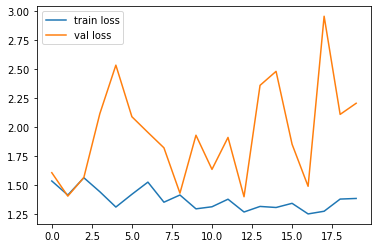

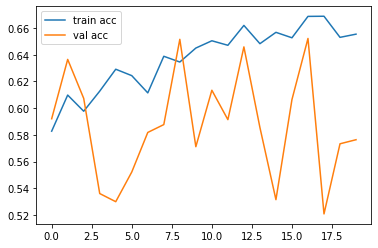

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
trail_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/tomato_leaf_dataset/valid',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4589 images belonging to 10 classes.


In [ ]:
y_pred = model.predict(trail_set)

In [ ]:
y_pred

array([[1.4142785e-02, 2.4744711e-04, 3.8908205e-03, ..., 9.7157085e-01,
        1.2748774e-06, 5.2510933e-14],
       [1.4780459e-29, 1.8713347e-11, 5.8947844e-13, ..., 3.8457955e-31,
        1.0000000e+00, 3.6822245e-10],
       [1.7132739e-07, 1.5202583e-03, 2.5815544e-01, ..., 6.1667216e-04,
        8.9894217e-03, 1.6247414e-12],
       ...,
       [2.9424572e-07, 5.1729794e-06, 9.9997926e-01, ..., 9.0639073e-11,
        9.9764239e-11, 1.8163432e-18],
       [4.5450412e-09, 5.0817339e-06, 3.1456747e-03, ..., 1.1237703e-11,
        2.9287166e-06, 3.6531729e-16],
       [5.0410205e-09, 1.5537798e-05, 8.0782542e-05, ..., 6.5589615e-05,
        2.6421717e-01, 4.7932343e-08]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(y_pred[0:1000])

[7 8 5 8 3 7 8 2 7 3 3 5 8 3 2 4 3 1 3 8 9 3 3 5 4 8 3 3 3 6 3 2 3 2 3 5 5
 3 2 5 3 2 5 2 8 3 8 5 2 3 2 7 1 2 5 5 5 3 3 8 2 9 3 1 5 2 5 3 3 3 2 9 3 6
 3 3 3 0 3 5 3 5 2 3 3 5 3 3 5 2 5 3 5 7 3 8 2 3 5 3 3 5 3 4 3 3 7 3 3 9 3
 9 7 0 5 3 7 3 3 3 3 1 5 8 5 3 3 8 3 5 5 7 5 5 9 2 3 2 3 5 3 3 4 8 3 2 3 4
 5 3 9 0 3 3 5 3 2 5 3 6 9 1 3 5 3 3 8 9 3 8 2 3 7 4 6 8 8 3 3 7 3 2 5 5 9
 8 5 3 5 8 8 3 3 0 3 5 3 3 2 8 3 3 3 5 6 1 3 4 5 3 2 3 4 3 5 3 5 5 4 3 8 3
 5 7 9 5 3 5 3 3 3 3 0 2 3 5 5 3 3 8 5 7 3 5 3 3 0 8 2 3 3 3 9 3 9 3 5 5 5
 0 3 9 8 2 2 3 8 9 3 3 8 5 3 9 2 8 2 3 5 3 0 2 7 3 3 3 3 3 7 3 3 3 5 8 0 3
 3 8 7 3 3 5 3 3 7 0 2 3 5 4 3 3 8 3 5 8 8 9 3 8 2 5 2 5 9 8 3 8 3 3 3 9 6
 3 3 5 5 5 3 5 2 3 3 0 9 0 5 3 7 5 8 5 5 5 5 5 3 2 3 9 9 8 0 5 3 3 7 5 3 5
 2 5 3 3 5 7 3 3 5 2 5 5 3 9 3 6 3 8 3 7 3 2 5 3 5 5 2 3 5 2 2 9 3 3 9 9 3
 5 5 3 3 3 3 3 7 5 3 2 3 2 3 5 3 3 3 5 3 9 2 5 3 3 0 1 6 0 5 2 3 3 3 8 5 3
 5 3 7 3 3 9 3 3 2 8 4 2 3 5 3 3 9 9 3 2 2 4 8 9 8 3 8 9 2 3 3 8 3 5 0 5 5
 2 2 2 3 0 3 7 2 0 4 3 3 

done

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/gdrive/MyDrive/tomato_leafDisease_pred.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/gdrive/MyDrive/tomato_leafDisease_pred.h5')

In [ ]:
img=image.load_img('/content/gdrive/MyDrive/tomato_leaf_dataset/valid/Tomato___Bacterial_spot/022e8a4a-9297-4de3-88a5-ee7aa46dd526___UF.GRC_BS_Lab Leaf 8682.JPG',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[ 95.,  95.,  97.],
        [ 95.,  95.,  97.],
        [ 96.,  96.,  98.],
        ...,
        [149., 149., 149.],
        [149., 149., 149.],
        [148., 148., 148.]],

       [[105., 105., 107.],
        [105., 105., 107.],
        [105., 105., 107.],
        ...,
        [148., 148., 148.],
        [148., 148., 148.],
        [148., 148., 148.]],

       [[119., 119., 121.],
        [118., 118., 120.],
        [117., 117., 119.],
        ...,
        [148., 148., 148.],
        [148., 148., 148.],
        [147., 147., 147.]],

       ...,

       [[114., 114., 112.],
        [113., 113., 111.],
        [111., 111., 109.],
        ...,
        [ 81.,  80.,  78.],
        [ 80.,  79.,  77.],
        [ 80.,  79.,  77.]],

       [[108., 108., 106.],
        [108., 108., 106.],
        [108., 108., 106.],
        ...,
        [ 81.,  80.,  78.],
        [ 80.,  79.,  77.],
        [ 80.,  79.,  77.]],

       [[113., 113., 111.],
        [113., 113., 111.],
        [112., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
result = model.predict(img_data)
result

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
a=np.argmax(result, axis=1)
print(a)

[9]
